### Importing the data

In [1]:
import numpy as np 
import pandas as pd 

# jayanth's dummy commit

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps1 = pd.read_csv('PS1.txt', delimiter = '\t', header = None)
df_ps2 = pd.read_csv('PS2.txt', delimiter = '\t', header = None)
df_ps3 = pd.read_csv('PS3.txt', delimiter = '\t', header = None)
df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)

In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs1 = pd.read_csv('FS1.txt', delimiter = '\t', header = None)
df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se


df_eps1 = pd.read_csv('EPS1.txt', delimiter = '\t', header = None)
df_se = pd.read_csv('SE.txt', delimiter = '\t', header = None)
df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)


In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:

df_ps1.columns = col(6001,'ps1')
df_ps2.columns = col(6001,'ps2')
df_ps3.columns = col(6001,'ps3')
df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')



In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:
df_fs1.columns = col(601,'fs1')
df_fs2.columns = col(601,'fs2')

In [11]:
df_vs1.columns = col(61,'vs1')

In [12]:
df_ce.columns = col(61,'ce')

In [13]:
df_cp.columns = col(61,'cp')

In [14]:
df_ps = pd.concat([df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs1, df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_eps1, df_se, df_vs1], axis = 1)

In [15]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


In [16]:
#pip install tsfresh

### Function for window statistical features

In [17]:
df_ps4.filter(regex="ps_mean_.*").head()

""
0
1
2
3
4


In [18]:
def sensor_statistic(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].mean(axis=1)

    return df_statistic



In [19]:
window_length = 300
ps1_window_mean  = sensor_statistic(df_ps1, window_length, 'ps1_mean_')

ps2_window_mean  = sensor_statistic(df_ps2, window_length, 'ps2_mean_')

ps3_window_mean  = sensor_statistic(df_ps3, window_length, 'ps3_mean_')

ps4_window_mean  = sensor_statistic(df_ps4, window_length, 'ps4_mean_')

ps5_window_mean  = sensor_statistic(df_ps5, window_length, 'ps5_mean_')

ps6_window_mean  = sensor_statistic(df_ps6, window_length, 'ps6_mean_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [20]:
window_length = 3
ts1_window_mean  = sensor_statistic(df_ts1, window_length, 'ts1_mean_')

ts2_window_mean  = sensor_statistic(df_ts2, window_length,'ts2_mean_')

ts3_window_mean  = sensor_statistic(df_ts3, window_length,'ts3_mean_')

ts4_window_mean  = sensor_statistic(df_ts4, window_length,'ts4_mean_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [21]:
window_length = 30
fs1_window_mean  = sensor_statistic(df_fs1, window_length,'fs1_mean_')

fs2_window_mean  = sensor_statistic(df_fs2, window_length,'fs2_mean_')


20 30 (2205, 600)
20 30 (2205, 600)


In [22]:
window_length = 3

ce_window_mean  = sensor_statistic(df_ce, window_length,'ce_mean_')

cp_window_mean  = sensor_statistic(df_cp, window_length,'cp_mean_')

se_window_mean  = sensor_statistic(df_se, window_length,'se_mean_')

vs1_window_mean  = sensor_statistic(df_vs1, window_length,'vs1_mean_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [23]:
window_length = 300
eps1_window_mean  = sensor_statistic(df_eps1, window_length,'eps1_mean_')


20 300 (2205, 6000)


In [24]:
mean_data = pd.concat([ps1_window_mean, ps2_window_mean, ps3_window_mean, ps4_window_mean, ps5_window_mean, 
                      ps6_window_mean, ts1_window_mean, ts2_window_mean, ts3_window_mean, ts4_window_mean,
                      fs1_window_mean, fs2_window_mean, eps1_window_mean, vs1_window_mean, ce_window_mean, 
                      cp_window_mean, se_window_mean], axis = 1)

In [25]:
mean_data.shape

(2205, 340)

### Calculate median for all sensors

In [26]:
def sensor_median(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].median(axis=1)

    return df_statistic



In [27]:
window_length = 300

ps1_window_median  = sensor_median(df_ps1, window_length, 'ps1_median_')

ps2_window_median  = sensor_median(df_ps2, window_length, 'ps2_median_')

ps3_window_median  = sensor_median(df_ps3, window_length, 'ps3_median_')

ps4_window_median  = sensor_median(df_ps4, window_length, 'ps4_median_')

ps5_window_median  = sensor_median(df_ps5, window_length, 'ps5_median_')

ps6_window_median  = sensor_median(df_ps6, window_length, 'ps6_median_')

eps1_window_median  = sensor_median(df_eps1, window_length,'eps1_median_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [28]:
window_length = 3
ts1_window_median  = sensor_median(df_ts1, window_length, 'ts1_median_')

ts2_window_median  = sensor_median(df_ts2, window_length,'ts2_median_')

ts3_window_median  = sensor_median(df_ts3, window_length,'ts3_median_')

ts4_window_median  = sensor_median(df_ts4, window_length,'ts4_median_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [29]:
window_length = 30
fs1_window_median  = sensor_median(df_fs1, window_length,'fs1_median_')

fs2_window_median  = sensor_median(df_fs2, window_length,'fs2_median_')


20 30 (2205, 600)
20 30 (2205, 600)


In [30]:
window_length = 3

ce_window_median  = sensor_median(df_ce, window_length,'ce_median_')

cp_window_median  = sensor_median(df_cp, window_length,'cp_median_')

se_window_median  = sensor_median(df_se, window_length,'se_median_')

vs1_window_median  = sensor_median(df_vs1, window_length,'vs1_median_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [31]:
median_data = pd.concat([ps1_window_median, ps2_window_median, ps3_window_median, ps4_window_median, ps5_window_median,
                                    ps6_window_median, ts1_window_median, ts2_window_median, ts3_window_median, ts4_window_median,
                                    fs1_window_median, fs2_window_median, eps1_window_median, vs1_window_median, ce_window_median,
                                    cp_window_median, se_window_median], axis = 1)
                         

In [32]:
median_data.shape

(2205, 340)

### Finding the maximum 

In [33]:
def sensor_max(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].max(axis=1)

    return df_statistic



In [34]:
window_length = 300

ps1_window_max  = sensor_max(df_ps1, window_length, 'ps1_max_')

ps2_window_max  = sensor_max(df_ps2, window_length, 'ps2_max_')

ps3_window_max  = sensor_max(df_ps3, window_length, 'ps3_max_')

ps4_window_max  = sensor_max(df_ps4, window_length, 'ps4_max_')

ps5_window_max  = sensor_max(df_ps5, window_length, 'ps5_max_')

ps6_window_max  = sensor_max(df_ps6, window_length, 'ps6_max_')

eps1_window_max  = sensor_max(df_eps1, window_length,'eps1_max_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [35]:
window_length = 3
ts1_window_max  = sensor_max(df_ts1, window_length, 'ts1_max_')

ts2_window_max  = sensor_max(df_ts2, window_length,'ts2_max_')

ts3_window_max  = sensor_max(df_ts3, window_length,'ts3_max_')

ts4_window_max  = sensor_max(df_ts4, window_length,'ts4_max_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [36]:
window_length = 30
fs1_window_max  = sensor_max(df_fs1, window_length,'fs1_max_')

fs2_window_max  = sensor_max(df_fs2, window_length,'fs2_max_')


20 30 (2205, 600)
20 30 (2205, 600)


In [37]:
window_length = 3

ce_window_max  = sensor_max(df_ce, window_length,'ce_max_')

cp_window_max  = sensor_max(df_cp, window_length,'cp_max_')

se_window_max  = sensor_max(df_se, window_length,'se_max_')

vs1_window_max  = sensor_max(df_vs1, window_length,'vs1_max_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [38]:
max_data = pd.concat([ps1_window_max, ps2_window_max, ps3_window_max, ps4_window_max, ps5_window_max,
                      ps6_window_max, ts1_window_max, ts2_window_max, ts3_window_max, ts4_window_max,
                      fs1_window_max, fs2_window_max, eps1_window_max, vs1_window_max,
                      ce_window_max, cp_window_max, se_window_max], axis = 1)

In [39]:
max_data.shape

(2205, 340)

### Calculating the min 

In [40]:
def sensor_min(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].min(axis=1)

    return df_statistic


In [41]:
window_length = 300

ps1_window_min  = sensor_min(df_ps1, window_length, 'ps1_min_')

ps2_window_min  = sensor_max(df_ps2, window_length, 'ps2_min_')

ps3_window_min  = sensor_max(df_ps3, window_length, 'ps3_min_')

ps4_window_min  = sensor_max(df_ps4, window_length, 'ps4_min_')

ps5_window_min  = sensor_max(df_ps5, window_length, 'ps5_min_')

ps6_window_min  = sensor_max(df_ps6, window_length, 'ps6_min_')

eps1_window_min  = sensor_max(df_eps1, window_length,'eps1_min_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [42]:
window_length = 3
ts1_window_min  = sensor_min(df_ts1, window_length, 'ts1_min_')

ts2_window_min  = sensor_min(df_ts2, window_length,'ts2_min_')

ts3_window_min  = sensor_min(df_ts3, window_length,'ts3_min_')

ts4_window_min  = sensor_min(df_ts4, window_length,'ts4_min_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [43]:
window_length = 30
fs1_window_min  = sensor_min(df_fs1, window_length,'fs1_min_')

fs2_window_min  = sensor_min(df_fs2, window_length,'fs2_min_')


20 30 (2205, 600)
20 30 (2205, 600)


In [44]:
window_length = 3

ce_window_min  = sensor_min(df_ce, window_length,'ce_min_')

cp_window_min  = sensor_min(df_cp, window_length,'cp_min_')

se_window_min  = sensor_min(df_se, window_length,'se_min_')

vs1_window_min  = sensor_min(df_vs1, window_length,'vs1_min_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [45]:
Min_data = pd.concat([ps1_window_min, ps2_window_min, ps3_window_min, ps4_window_min, ps5_window_min,  ps6_window_min, 
                      ts1_window_min, ts2_window_min, ts3_window_min, ts4_window_min, 
                      fs1_window_min, fs2_window_min, eps1_window_min, vs1_window_min, 
                      ce_window_min, cp_window_min, se_window_min], axis = 1)

In [46]:
import statistics as st

### Calculate the variance 

In [47]:
def sensor_variance(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].var(axis=1)

    return df_statistic


In [48]:
window_length = 300

ps1_window_variance  = sensor_variance(df_ps1, window_length, 'ps1_variance_')

ps2_window_variance  = sensor_variance(df_ps2, window_length, 'ps2_variance_')

ps3_window_variance  = sensor_variance(df_ps3, window_length, 'ps3_variance_')

ps4_window_variance  = sensor_variance(df_ps4, window_length, 'ps4_variance_')

ps5_window_variance  = sensor_variance(df_ps5, window_length, 'ps5_variance_')

ps6_window_variance  = sensor_variance(df_ps6, window_length, 'ps6_variance_')

eps1_window_variance  = sensor_variance(df_eps1, window_length,'eps1_variance_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [49]:
window_length = 3
ts1_window_variance  = sensor_variance(df_ts1, window_length, 'ts1_variance_')

ts2_window_variance  = sensor_variance(df_ts2, window_length,'ts2_variance_')

ts3_window_variance  = sensor_variance(df_ts3, window_length,'ts3_variance_')

ts4_window_variance  = sensor_variance(df_ts4, window_length,'ts4_variance_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [50]:
window_length = 30

fs1_window_variance  = sensor_variance(df_fs1, window_length,'fs1_variance_')

fs2_window_variance  = sensor_variance(df_fs2, window_length,'fs2_variance_')


20 30 (2205, 600)
20 30 (2205, 600)


In [51]:
window_length = 3

ce_window_variance  = sensor_variance(df_ce, window_length,'ce_variance_')

cp_window_variance  = sensor_variance(df_cp, window_length,'cp_variance_')

se_window_variance  = sensor_variance(df_se, window_length,'se_variance_')

vs1_window_variance  = sensor_variance(df_vs1, window_length,'vs1_variance_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [52]:
variance_data = pd.concat([ps1_window_variance, ps2_window_variance, ps3_window_variance, ps4_window_variance, ps5_window_variance,  ps6_window_variance, 
                           ts1_window_variance, ts2_window_variance, ts3_window_variance, ts4_window_variance, 
                           fs1_window_variance, fs2_window_variance, eps1_window_variance, vs1_window_variance, 
                           ce_window_variance, cp_window_variance, se_window_variance], axis = 1)

### Calculating standard deviation

In [53]:
def sensor_std(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
            df_statistic[str(sensor)+str(i)] = dataframe[windows[i]].std(axis=1)

    return df_statistic


In [54]:
window_length = 300

ps1_window_std  = sensor_std(df_ps1, window_length, 'ps1_std_')

ps2_window_std  = sensor_std(df_ps2, window_length, 'ps2_std_')

ps3_window_std  = sensor_std(df_ps3, window_length, 'ps3_std_')

ps4_window_std  = sensor_std(df_ps4, window_length, 'ps4_std_')

ps5_window_std  = sensor_std(df_ps5, window_length, 'ps5_std_')

ps6_window_std  = sensor_std(df_ps6, window_length, 'ps6_std_')

eps1_window_std  = sensor_std(df_eps1, window_length,'eps1_std_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [55]:
window_length = 3
ts1_window_std  = sensor_std(df_ts1, window_length, 'ts1_std_')

ts2_window_std  = sensor_std(df_ts2, window_length,'ts2_std_')

ts3_window_std  = sensor_std(df_ts3, window_length,'ts3_std_')

ts4_window_std  = sensor_std(df_ts4, window_length,'ts4_std_')



20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [56]:
window_length = 30

fs1_window_std  = sensor_std(df_fs1, window_length,'fs1_std_')

fs2_window_std  = sensor_std(df_fs2, window_length,'fs2_std_')


20 30 (2205, 600)
20 30 (2205, 600)


In [57]:
window_length = 3

ce_window_std  = sensor_std(df_ce, window_length,'ce_std_')

cp_window_std  = sensor_std(df_cp, window_length,'cp_std_')

se_window_std  = sensor_std(df_se, window_length,'se_std_')

vs1_window_std  = sensor_std(df_vs1, window_length,'vs1_std_')




20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [58]:
std_data = pd.concat([ps1_window_std, ps2_window_std, ps3_window_std, ps4_window_std, ps5_window_std,  ps6_window_std,
                      ts1_window_std, ts2_window_std, ts3_window_std, ts4_window_std, fs1_window_std, fs2_window_std,
                      eps1_window_std, vs1_window_std, ce_window_std, cp_window_std, se_window_std], axis = 1)

### Calculating IQR

In [59]:
from scipy.stats import iqr


def sensor_iqr(dataframe, window_length, sensor) : 
    df_statistic = pd.DataFrame(index = dataframe.index)
    columns = dataframe.columns.tolist()[1:]

    # window_length = 60 
    start = 0

    windows = []
    for i in range(start,len(columns),window_length) : 
        windows.append(columns[start : start + window_length])
        start = start + window_length

    print(len(windows),window_length,dataframe.shape)

    for i in range(len(windows)) :  # change the mean to appropriate statistic
        
            df_statistic[str(sensor)+str(i)] = iqr(dataframe[windows[i]],axis=1)

    return df_statistic


In [60]:
window_length = 300

ps1_window_iqr  = sensor_iqr(df_ps1, window_length, 'ps1_iqr_')

ps2_window_iqr  = sensor_iqr(df_ps2, window_length, 'ps2_iqr_')

ps3_window_iqr  = sensor_iqr(df_ps3, window_length, 'ps3_iqr_')

ps4_window_iqr  = sensor_iqr(df_ps4, window_length, 'ps4_iqr_')

ps5_window_iqr  = sensor_iqr(df_ps5, window_length, 'ps5_iqr_')

ps6_window_iqr  = sensor_iqr(df_ps6, window_length, 'ps6_iqr_')

eps1_window_iqr  = sensor_iqr(df_eps1, window_length,'eps1_iqr_')

20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)
20 300 (2205, 6000)


In [61]:
window_length = 3
ts1_window_iqr  = sensor_iqr(df_ts1, window_length, 'ts1_iqr_')

ts2_window_iqr  = sensor_iqr(df_ts2, window_length,'ts2_iqr_')

ts3_window_iqr  = sensor_iqr(df_ts3, window_length,'ts3_iqr_')

ts4_window_iqr  = sensor_iqr(df_ts4, window_length,'ts4_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [62]:
window_length = 30

fs1_window_iqr  = sensor_iqr(df_fs1, window_length,'fs1_iqr_')

fs2_window_iqr  = sensor_iqr(df_fs2, window_length,'fs2_iqr_')


20 30 (2205, 600)
20 30 (2205, 600)


In [63]:
window_length = 3

ce_window_iqr  = sensor_iqr(df_ce, window_length,'ce_iqr_')

cp_window_iqr  = sensor_iqr(df_cp, window_length,'cp_iqr_')

se_window_iqr  = sensor_iqr(df_se, window_length,'se_iqr_')

vs1_window_iqr  = sensor_iqr(df_vs1, window_length,'vs1_iqr_')

20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)
20 3 (2205, 60)


In [64]:
iqr_data = pd.concat([ps1_window_iqr, ps2_window_iqr, ps3_window_iqr, ps4_window_iqr, ps5_window_iqr,  ps6_window_iqr,
                      ts1_window_iqr, ts2_window_iqr, ts3_window_iqr, ts4_window_iqr, fs1_window_iqr, fs2_window_iqr,
                      eps1_window_iqr, vs1_window_iqr, ce_window_iqr, cp_window_iqr, se_window_iqr], axis = 1)

### Merge all datasets to get the final dataset

In [65]:
Final = pd.concat([median_data, max_data, Min_data, std_data, variance_data, iqr_data], axis = 1)

In [66]:
Final.shape

(2205, 2040)

In [67]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

In [68]:
Final_target = pd.concat([Final, profile], axis = 1)

In [69]:
Final_target.shape

(2205, 2045)

In [70]:
profile_Valve = profile['Valve Condition']

## Valve Classification

### Train-test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(Final, profile_Valve, train_size=0.7, test_size=0.3, random_state=42,stratify = profile_Valve)

In [73]:
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

print(y_train.value_counts())
print(y_test.value_counts())

100    787
90     252
80     252
73     252
Name: Valve Condition, dtype: int64
100    338
90     108
80     108
73     108
Name: Valve Condition, dtype: int64


### Balancing the Data

In [74]:

## SMOTE method is used to balance data
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_sample(X_train,y_train)
X_train = pd.DataFrame(X_train, columns=X_train.columns)

y_train_smt = pd.DataFrame(y_train)

In [75]:
y_train_smt['Valve Condition'].value_counts()

73     787
100    787
90     787
80     787
Name: Valve Condition, dtype: int64

**Dataset is fairly balanced**

## Standardisation of Data

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler() ## x-mean/std

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [79]:
X_train_scaled.columns = Final.columns 
X_test_scaled.columns = Final.columns 

In [80]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(662, 2040)
(3148, 2040)


In [81]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV

from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [82]:
def evaluate_model(dt_classifier,y_train,X_train,y_test,X_test):
    print("Train Precision :", (precision_score(y_train, dt_classifier.predict(X_train)))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Precision :", (precision_score(y_test, dt_classifier.predict(X_test)))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### SVM for Valve condition classification

## PCA

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(random_state=42)
X_train_pca = pca.fit(X_train_scaled)

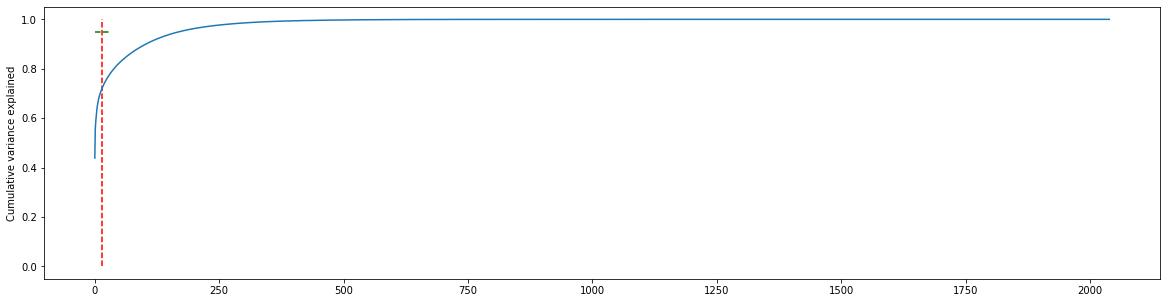

In [85]:
import matplotlib.pyplot as plt

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [86]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)


In [87]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(3148, 20)
(662, 20)


In [88]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [89]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_pca, y_train)
svm_predictions = svm_model_linear.predict(X_test_pca)

In [90]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[105,   3,   0,   0],
       [  0, 102,   6,   0],
       [  1,   7,  92,   8],
       [  0,   1,  71, 266]], dtype=int64)

In [91]:
def cmatrix(model, test):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = metrics.plot_confusion_matrix(model, test,y_test, 
                                         display_labels= ['close to total failure','severe lag','small lag','optimal switching behavior'],  ax = ax)
    return disp.confusion_matrix
    

array([[105,   3,   0,   0],
       [  0, 102,   6,   0],
       [  1,   7,  92,   8],
       [  0,   1,  71, 266]], dtype=int64)

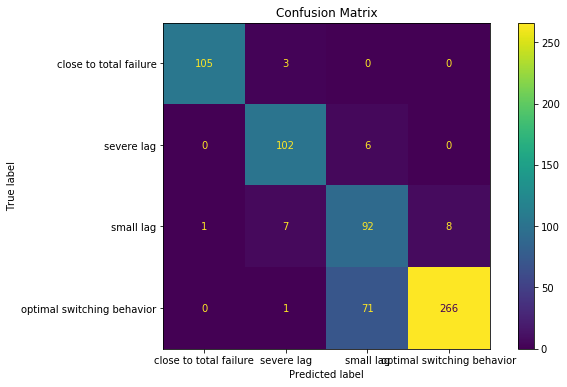

In [92]:
cmatrix(svm_model_linear, X_test_pca)

In [93]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

          73       0.99      0.97      0.98       108
          80       0.90      0.94      0.92       108
          90       0.54      0.85      0.66       108
         100       0.97      0.79      0.87       338

    accuracy                           0.85       662
   macro avg       0.85      0.89      0.86       662
weighted avg       0.89      0.85      0.86       662



In [94]:
y_score_svm = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_test_pca)
y_score_svm

array([[ 0.80085698,  3.31455157,  2.20244915, -0.31461774],
       [-0.26048813,  3.31004478,  2.26565502,  0.68940036],
       [-0.27237553,  3.30276786,  2.26608105,  0.69873723],
       ...,
       [-0.30725055,  0.71235574,  2.29733341,  3.30251546],
       [-0.30958253,  0.69596495,  2.30135798,  3.31109205],
       [-0.29947075,  0.80573915,  3.29702315,  2.22441431]])

In [95]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(y_score, X_test, y_test, n_classes= 3, figsize = (20,6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

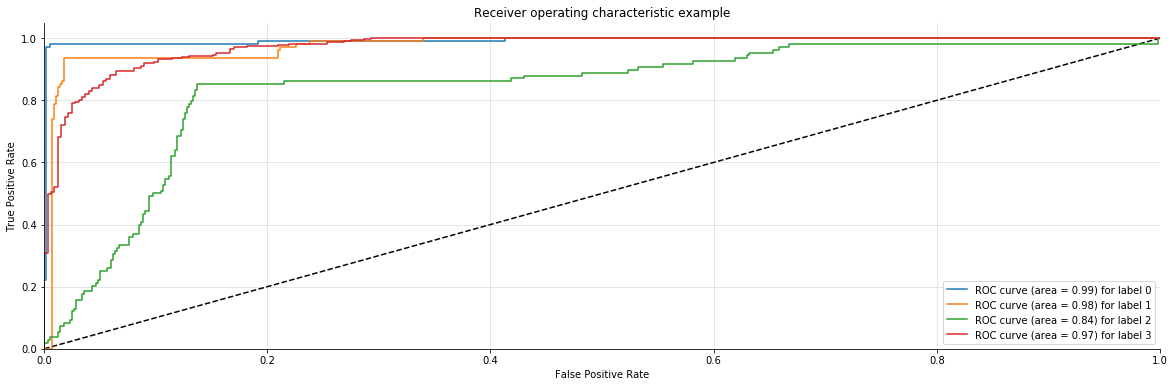

In [96]:
plot_multiclass_roc(y_score_svm,X_test_pca, y_test, 4)

In [97]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

          73       0.99      0.97      0.98       108
          80       0.90      0.94      0.92       108
          90       0.54      0.85      0.66       108
         100       0.97      0.79      0.87       338

    accuracy                           0.85       662
   macro avg       0.85      0.89      0.86       662
weighted avg       0.89      0.85      0.86       662



### Building an RF classifier for Cooler 

In [98]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

array([[108,   0,   0,   0],
       [  0, 107,   1,   0],
       [  0,   2, 103,   3],
       [  0,   0,  13, 325]], dtype=int64)

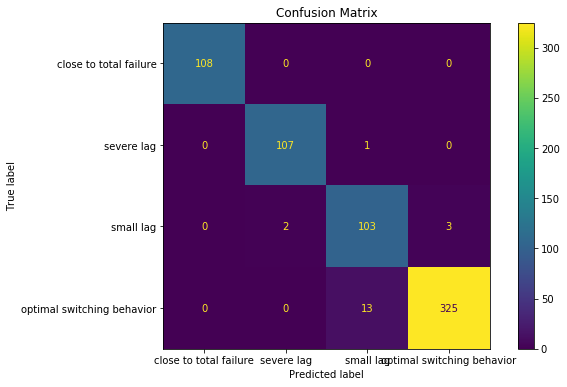

In [99]:
cmatrix(classifier_rf,X_test_scaled)

In [100]:
y_score_rf = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
y_score_rf

array([[0. , 1. , 0. , 0. ],
       [0. , 0.8, 0.2, 0. ],
       [0. , 0.9, 0.1, 0. ],
       ...,
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0. , 0.9, 0.1]])

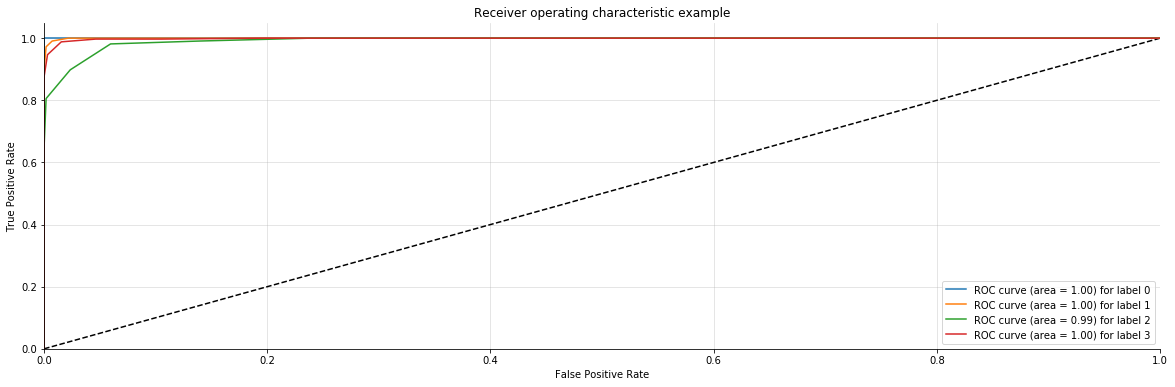

In [101]:
plot_multiclass_roc(y_score_rf, X_test_scaled, y_test, n_classes=4, figsize=(20, 6))

In [102]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

          73       1.00      1.00      1.00       108
          80       0.98      0.99      0.99       108
          90       0.88      0.95      0.92       108
         100       0.99      0.96      0.98       338

    accuracy                           0.97       662
   macro avg       0.96      0.98      0.97       662
weighted avg       0.97      0.97      0.97       662



### kNN for Valve classification

In [103]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_pca, y_train)


array([[ 94,  12,   2,   0],
       [  9,  77,  22,   0],
       [  3,  27,  76,   2],
       [  0,  17,  92, 229]], dtype=int64)

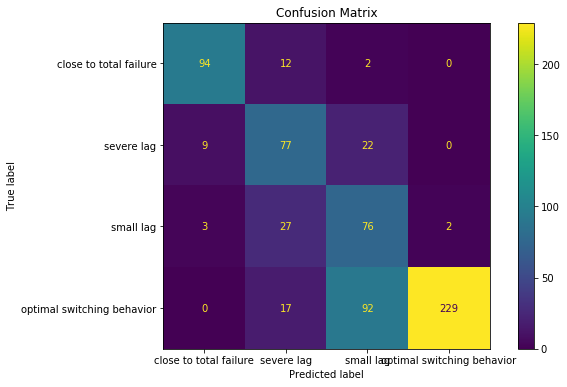

In [104]:
cmatrix(knn,X_test_pca)

In [105]:
y_score_knn = knn.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score_knn

array([[0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.85714286, 0.14285714, 0.        ],
       ...,
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.85714286, 0.        , 0.14285714]])

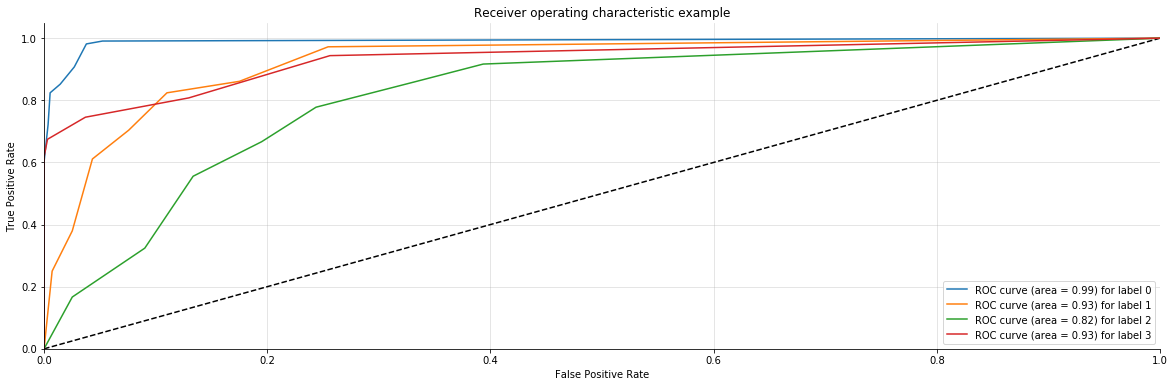

In [106]:
plot_multiclass_roc(y_score_knn, X_test_pca, y_test, n_classes=4, figsize=(20, 6))

In [107]:
print(metrics.classification_report(y_test, knn.predict(X_test_pca)))

              precision    recall  f1-score   support

          73       0.89      0.87      0.88       108
          80       0.58      0.71      0.64       108
          90       0.40      0.70      0.51       108
         100       0.99      0.68      0.80       338

    accuracy                           0.72       662
   macro avg       0.71      0.74      0.71       662
weighted avg       0.81      0.72      0.74       662



### Performance in noise

In [108]:
import numpy as np 
mu, sigma = 0, np.std(X_test_scaled)*0.20
noise = np.random.normal(mu, sigma, X_test_scaled.shape)

X_testnoise = X_test_scaled + noise

In [109]:
print(metrics.classification_report(y_test, classifier_rf.predict(X_testnoise)))

              precision    recall  f1-score   support

          73       0.96      1.00      0.98       108
          80       0.94      0.86      0.90       108
          90       0.69      0.77      0.72       108
         100       0.94      0.92      0.93       338

    accuracy                           0.90       662
   macro avg       0.88      0.89      0.88       662
weighted avg       0.90      0.90      0.90       662



In [110]:
y_score_rfnoise = classifier_rf.fit(X_train_scaled, y_train).predict_proba(X_testnoise)
y_score_rfnoise

array([[0. , 0.8, 0.2, 0. ],
       [0.1, 0.9, 0. , 0. ],
       [0. , 0.4, 0.4, 0.2],
       ...,
       [0. , 0.1, 0.1, 0.8],
       [0. , 0.1, 0.2, 0.7],
       [0.1, 0.3, 0.4, 0.2]])

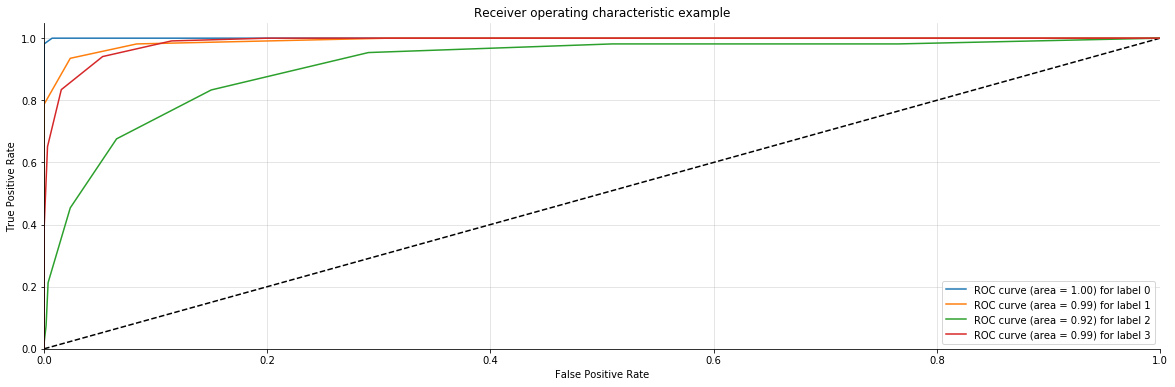

In [111]:
plot_multiclass_roc(y_score_rfnoise, X_testnoise, y_test, n_classes=4, figsize=(20, 6))

In [112]:
import numpy as np 
mu, sigma = 0, np.std(X_test_pca)*0.20
noise = np.random.normal(mu, sigma, X_test_pca.shape)

X_testpcanoise = X_test_pca + noise

              precision    recall  f1-score   support

          73       0.83      0.84      0.83       108
          80       0.44      0.59      0.51       108
          90       0.39      0.61      0.48       108
         100       0.95      0.67      0.79       338

    accuracy                           0.68       662
   macro avg       0.65      0.68      0.65       662
weighted avg       0.76      0.68      0.70       662



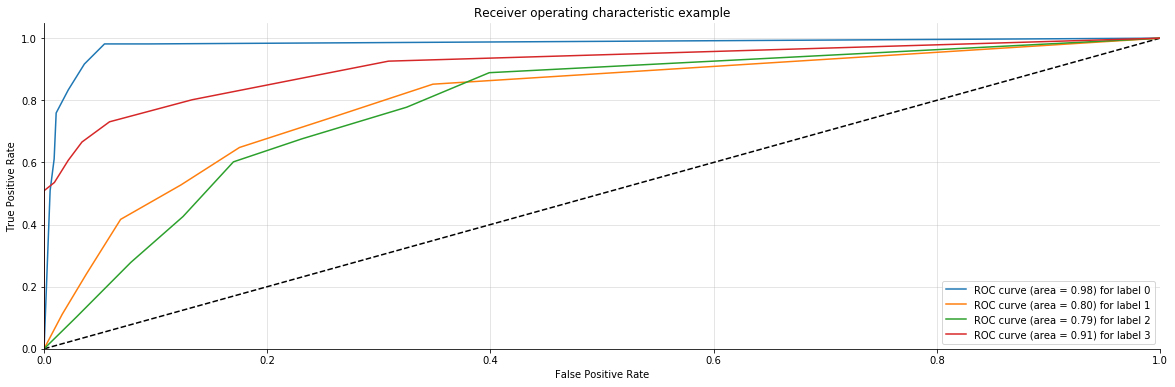

In [113]:
print(metrics.classification_report(y_test, knn.predict(X_testpcanoise)))

y_score_knnnoise = knn.fit(X_train_pca, y_train).predict_proba(X_testpcanoise)
y_score_knnnoise

plot_multiclass_roc(y_score_knnnoise, X_testpcanoise, y_test, n_classes=4, figsize=(20, 6))


              precision    recall  f1-score   support

          73       0.91      0.93      0.92       108
          80       0.60      0.66      0.63       108
          90       0.38      0.60      0.46       108
         100       0.90      0.70      0.79       338

    accuracy                           0.71       662
   macro avg       0.70      0.72      0.70       662
weighted avg       0.77      0.71      0.73       662



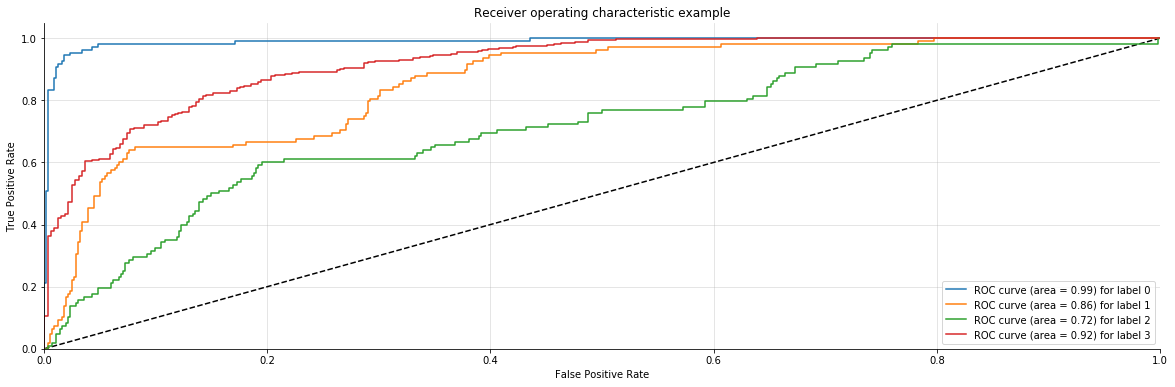

In [114]:
print(metrics.classification_report(y_test, svm_model_linear.predict(X_testpcanoise)))

y_score_svmnoise = svm_model_linear.fit(X_train_pca, y_train).decision_function(X_testpcanoise)
y_score_svmnoise

plot_multiclass_roc(y_score_svmnoise, X_testpcanoise, y_test, n_classes=4, figsize=(20, 6))


array([[108,   0,   0,   0],
       [  4,  93,  11,   0],
       [  0,   6,  83,  19],
       [  0,   0,  27, 311]], dtype=int64)

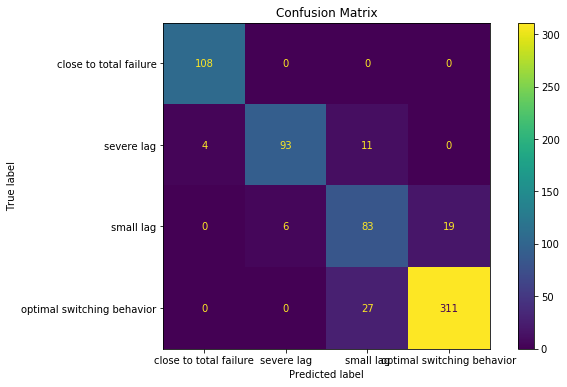

In [115]:
cmatrix(classifier_rf, X_testnoise)